In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [4]:
#Converting categorical data to numeric data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [5]:
data['State']= label_encoder.fit_transform(data['State']) 

In [6]:
data.rename(columns = {'R&D Spend':'RDspend'}, inplace = True)

In [7]:
data.rename(columns = {'Marketing Spend':'Mspend'}, inplace = True)

In [8]:
data.head()

,RDspend,Administration,Mspend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDspend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   Mspend          50 non-null     float64
 3   State           50 non-null     int32  
 4   Profit          50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [10]:
#check for missing values
data.isna().sum()

RDspend           0
Administration    0
Mspend            0
State             0
Profit            0
dtype: int64

In [11]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [12]:
data.corr()

,RDspend,Administration,Mspend,State,Profit
RDspend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Mspend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


# Scatterplot between variables along with histograms

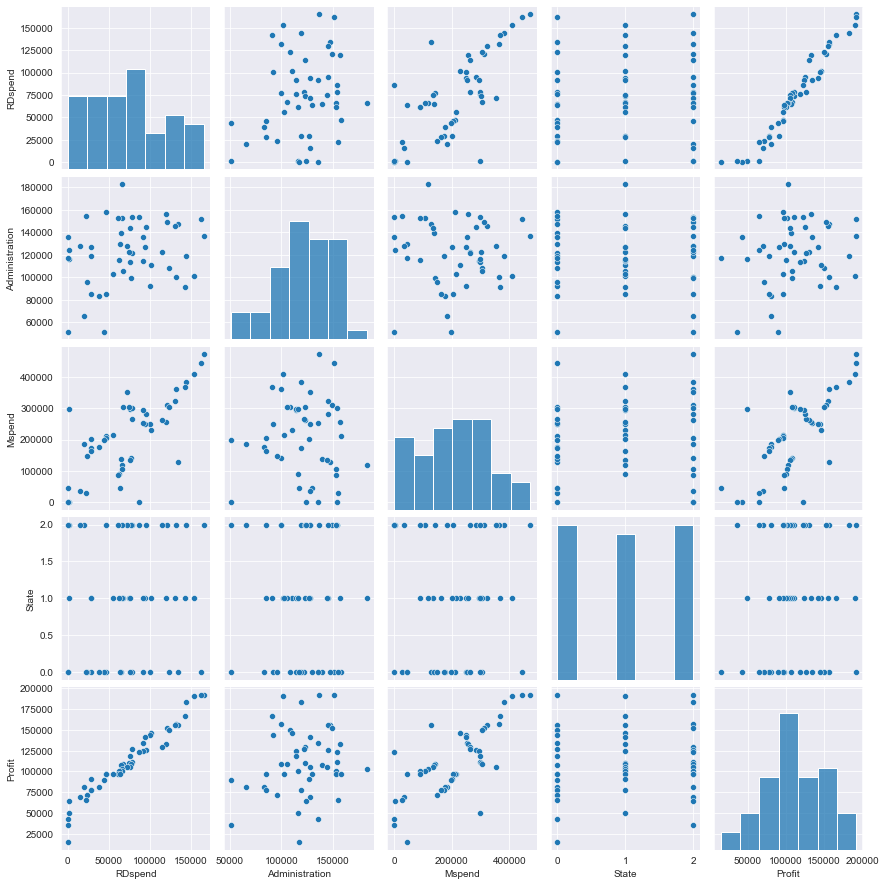

In [13]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Preparing a model

In [14]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDspend+Administration+Mspend+State',data=data).fit()

In [15]:
#Coefficients
model.params

Intercept         50142.506443
RDspend               0.805760
Administration       -0.026826
Mspend                0.027228
State               -22.320577
dtype: float64

In [16]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.368962
RDspend           17.608621
Administration    -0.519906
Mspend             1.636966
State             -0.013865
dtype: float64 
 Intercept         2.900008e-09
RDspend           8.249206e-22
Administration    6.056771e-01
Mspend            1.086131e-01
State             9.889988e-01
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

# Calculating VIF

In [18]:
rsq_RDS = smf.ols('RDspend~Administration+Mspend+State',data=data).fit().rsquared  
vif_RDS = 1/(1-rsq_RDS) 

rsq_Ad = smf.ols('Administration~RDspend+Mspend+State',data=data).fit().rsquared  
vif_Ad = 1/(1-rsq_Ad) 

rsq_MS = smf.ols('Mspend~RDspend+Administration+State',data=data).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 

rsq_St = smf.ols('State~RDspend+Administration+Mspend',data=data).fit().rsquared  
vif_St = 1/(1-rsq_St) 

# Storing vif values in a data frame
d1 = {'Variables':['RDS','Admin','MS','State'],'VIF':[vif_RDS,vif_Ad,vif_MS,vif_St]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.481178
1,Admin,1.175315
2,MS,2.326780
3,State,1.011281


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

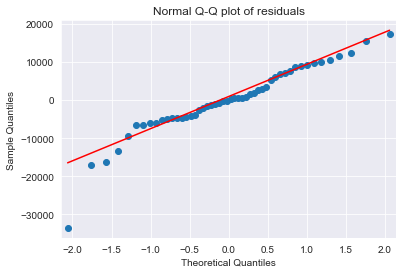

In [19]:
import statsmodels.api as sm;
qqplot=sm.qqplot(model.resid,line='q') # To draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

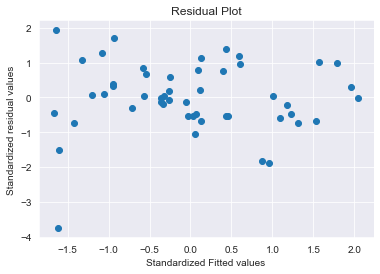

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

In [22]:
import statsmodels.api as sm

eval_env: 1


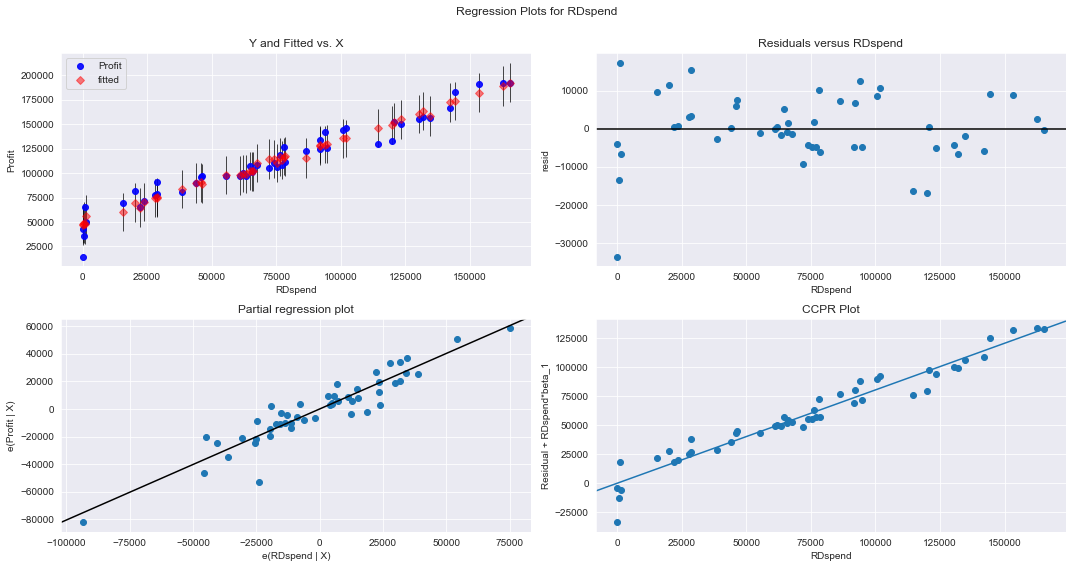

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

eval_env: 1


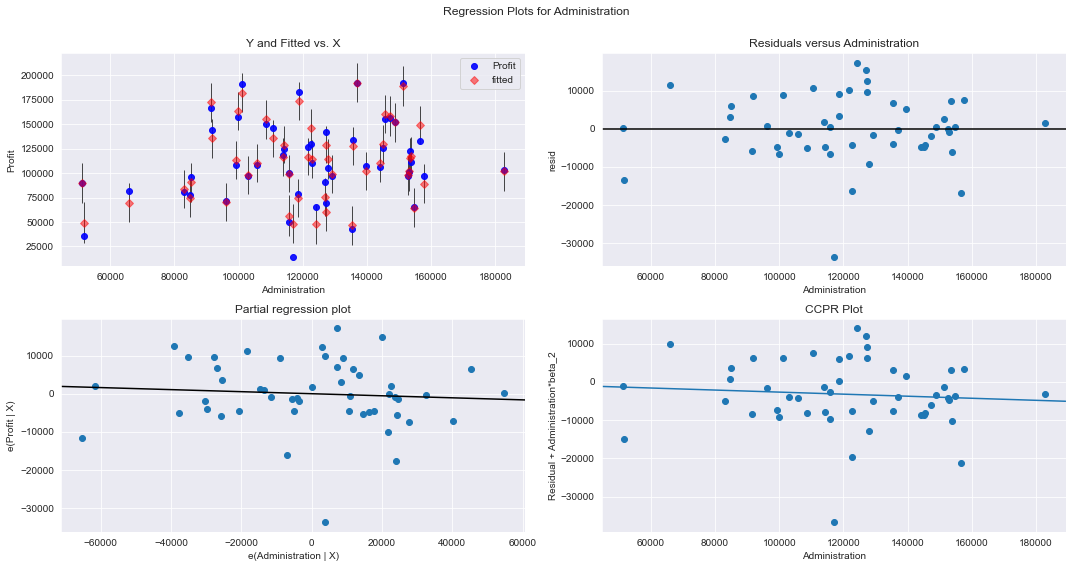

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


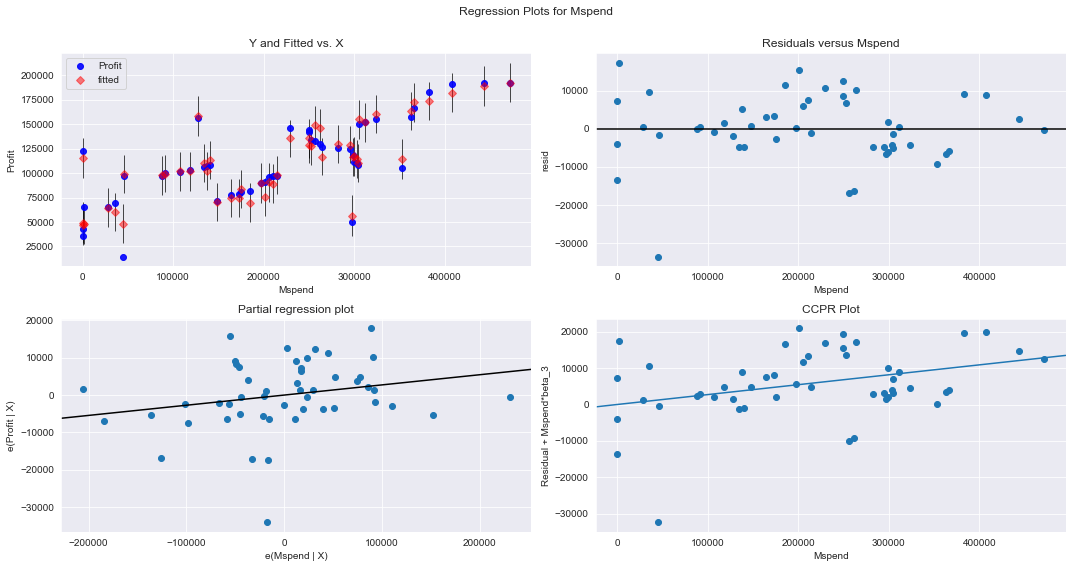

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Mspend", fig=fig)
plt.show()

eval_env: 1


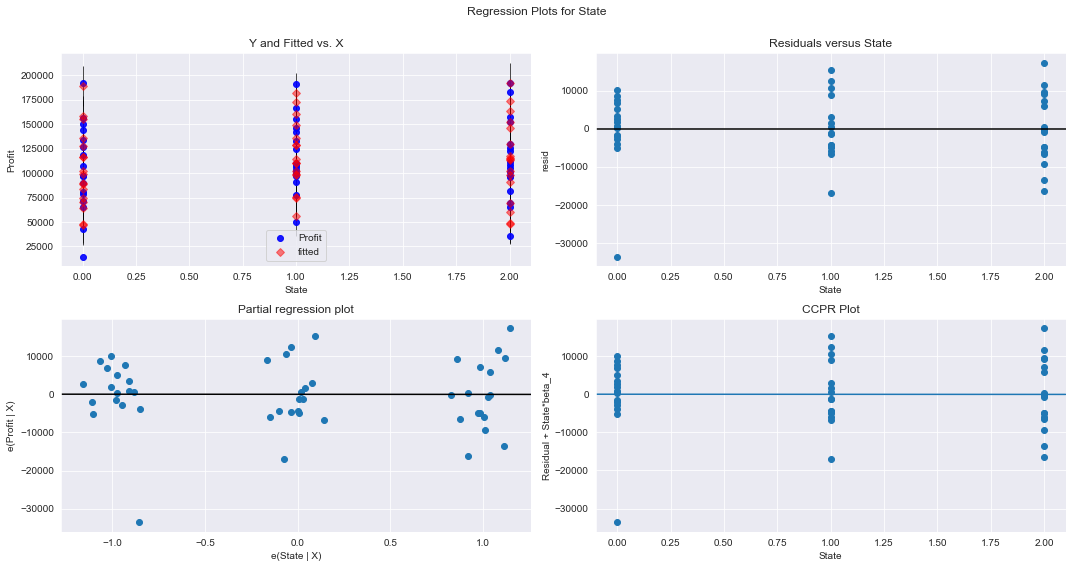

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

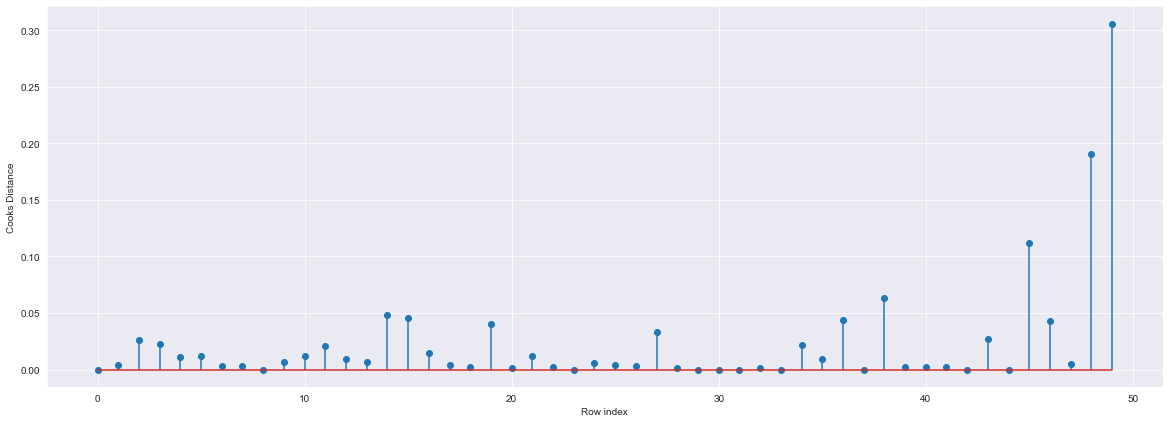

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than others
(np.argmax(c),np.max(c))

(49, 0.3060281954699336)

# High Influence points

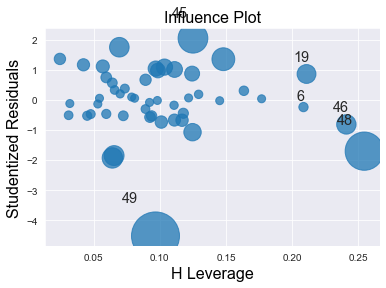

In [30]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [41]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [50]:
data[data.index.isin([45,46,48,49])]

,RDspend,Administration,Mspend,State,Profit
45,1000.23,124153.04,1903.93,2,64926.08
46,1315.46,115816.21,297114.46,1,49490.75
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


In [33]:
#See the differences in HP and other variable values
data.head()

,RDspend,Administration,Mspend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Improving the model

In [51]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df=data.drop(data.index[[45,46,48,49]],axis=0).reset_index()

In [52]:
#Drop the original index
df=df.drop(['index'],axis=1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDspend         46 non-null     float64
 1   Administration  46 non-null     float64
 2   Mspend          46 non-null     float64
 3   State           46 non-null     int32  
 4   Profit          46 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.7 KB


# Build Model

In [54]:
#Regenerate R-Squared and AIC values
model1 = smf.ols('Profit~RDspend+Administration+Mspend+State',data=df).fit()

In [55]:
#Coefficients
model1.params

Intercept         57251.196803
RDspend               0.773026
Administration       -0.052033
Mspend                0.028291
State              -872.456218
dtype: float64

In [56]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept          9.784898
RDspend           19.197947
Administration    -1.198496
Mspend             1.940207
State             -0.668040
dtype: float64 
 Intercept         2.766977e-12
RDspend           4.209423e-22
Administration    2.376059e-01
Mspend            5.925334e-02
State             5.078513e-01
dtype: float64


In [57]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9629964276645023, 0.959386323046405)